# Analysis Phase #

### Introduction & Setup ###

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the scraped data
df = pd.read_csv('ligue1_2024_matches.csv')
print(f"Dataset loaded: {len(df)} matches")
df.head()

Dataset loaded: 176 matches


,Date,Home,Away,Home_Score,Away_Score,Final_Score,Link,first_goal_min
0,NaN,Reims,Lille,0,2,0-2,https://ca.soccerway.com/matches/2024/08/17/france/ligue-1/reims/lille/4372751/,75.0
1,NaN,Monaco,Saint-Étienne,1,0,1-0,https://ca.soccerway.com/matches/2024/08/17/france/ligue-1/monaco/saint-tienne/4372750/,28.0
2,NaN,Auxerre,Nice,2,1,2-1,https://ca.soccerway.com/matches/2024/08/18/france/ligue-1/auxerre/nice/4372752/,44.0
3,NaN,Angers,Lens,0,1,0-1,https://ca.soccerway.com/matches/2024/08/18/france/ligue-1/angers/lens/4372749/,28.0
4,NaN,Toulouse,Nantes,0,0,0-0,https://ca.soccerway.com/matches/2024/08/18/france/ligue-1/toulouse/nantes/4372748/,NaN


### Data Overview ###

In [45]:
# Basic statistics
print("=== DATASET OVERVIEW ===")
print(f"Total matches: {len(df)}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Teams: {len(set(df['Home'].unique()) | set(df['Away'].unique()))}")
print(f"Matches with goals: {len(df[df['first_goal_min'].notna()])}")
print(f"0-0 draws: {len(df[(df['Home_Score']==0) & (df['Away_Score']==0)])}")

=== DATASET OVERVIEW ===
Total matches: 176
Date range: nan to nan
Teams: 18
Matches with goals: 163
0-0 draws: 13


###  Goal Analysis ###

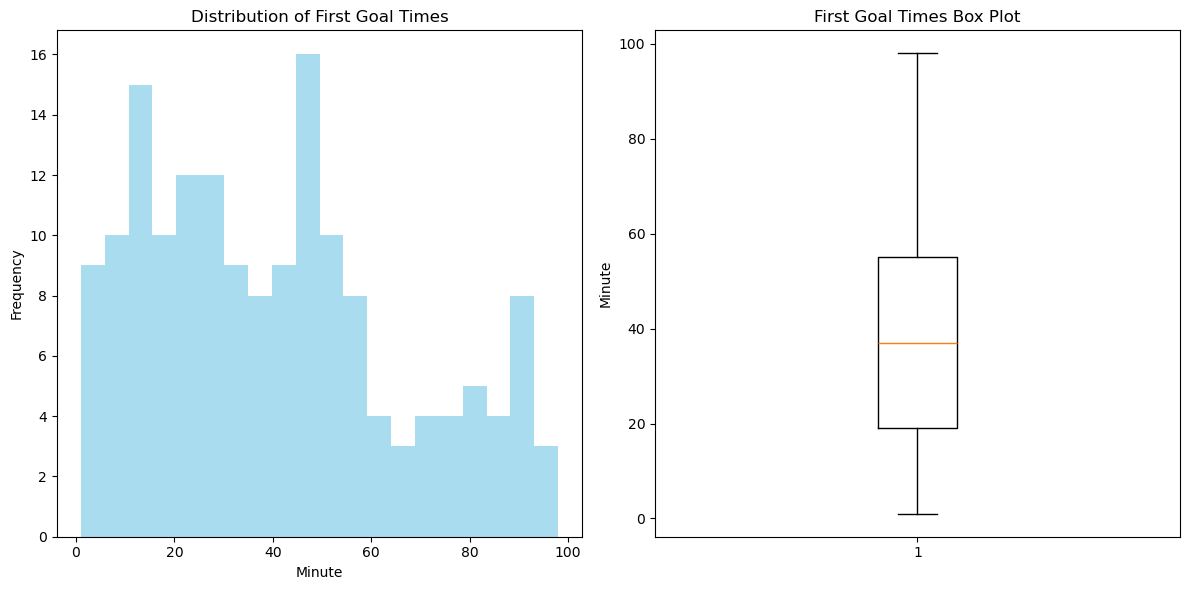

Average first goal time: 40.4 minutes
Median first goal time: 37.0 minutes


In [46]:
# First goal timing analysis
goals_df = df[df['first_goal_min'].notna()]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(goals_df['first_goal_min'], bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of First Goal Times')
plt.xlabel('Minute')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(goals_df['first_goal_min'])
plt.title('First Goal Times Box Plot')
plt.ylabel('Minute')
plt.tight_layout()
plt.show()

print(f"Average first goal time: {goals_df['first_goal_min'].mean():.1f} minutes")
print(f"Median first goal time: {goals_df['first_goal_min'].median():.1f} minutes")

### Score Distribution ###

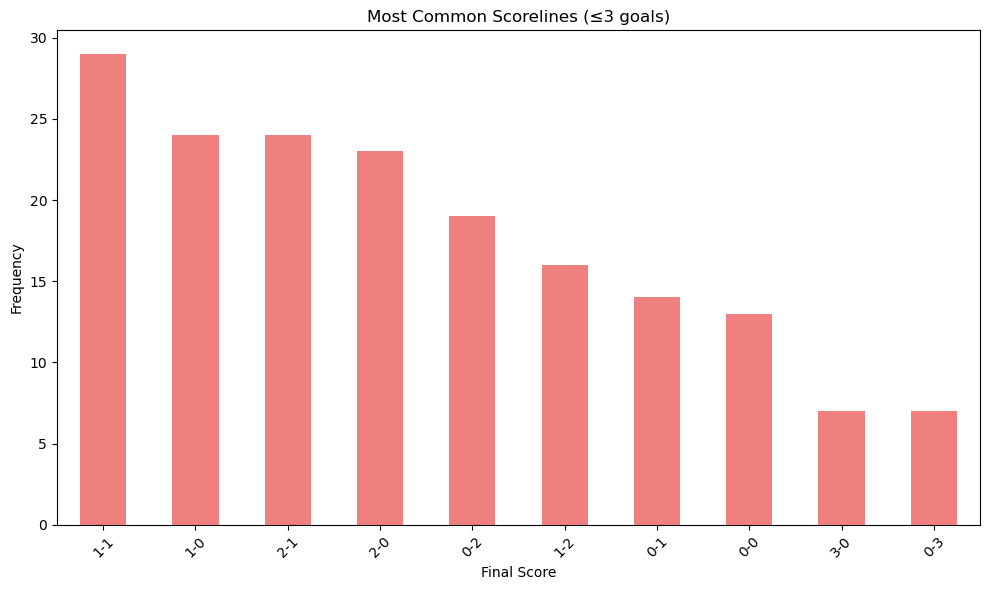

In [47]:
# Score pattern analysis
score_counts = df['Final_Score'].value_counts().head(10)

plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar', color='lightcoral')
plt.title('Most Common Scorelines (≤3 goals)')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Team Performance ###

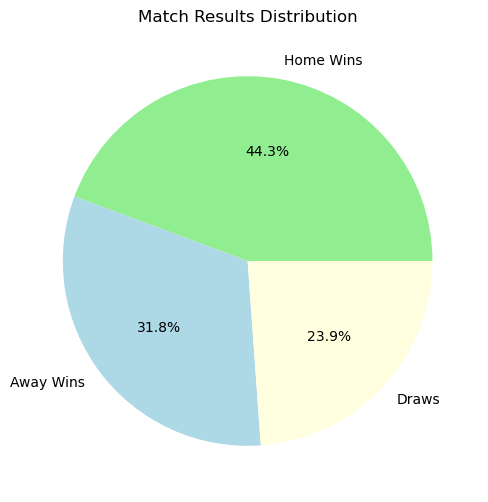

In [48]:
# Home vs Away performance
home_wins = len(df[df['Home_Score'] > df['Away_Score']])
away_wins = len(df[df['Away_Score'] > df['Home_Score']])
draws = len(df[df['Home_Score'] == df['Away_Score']])

plt.figure(figsize=(8, 6))
plt.pie([home_wins, away_wins, draws], 
        labels=['Home Wins', 'Away Wins', 'Draws'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightblue', 'lightyellow'])
plt.title('Match Results Distribution')
plt.show()

### Early vs. Late Goals ###

In [49]:
# Early goals (≤30 min) vs Late goals (>70 min)
early_goals = len(goals_df[goals_df['first_goal_min'] <= 30])
late_goals = len(goals_df[goals_df['first_goal_min'] > 70])
mid_goals = len(goals_df) - early_goals - late_goals

print(f"Early goals (≤30 min): {early_goals} ({early_goals/len(goals_df)*100:.1f}%)")
print(f"Mid-game goals (31-70 min): {mid_goals} ({mid_goals/len(goals_df)*100:.1f}%)")
print(f"Late goals (>70 min): {late_goals} ({late_goals/len(goals_df)*100:.1f}%)")

Early goals (≤30 min): 68 (41.7%)
Mid-game goals (31-70 min): 69 (42.3%)
Late goals (>70 min): 26 (16.0%)


### Data Quality Report ###

In [50]:
# Validation report
print("=== DATA QUALITY REPORT ===")
print(f"Missing first_goal_min (expected for 0-0): {df['first_goal_min'].isna().sum()}")
print(f"Unique teams found: {len(set(df['Home'].unique()) | set(df['Away'].unique()))}")
print(f"Date range coverage: {len(df['Date'].unique())} unique dates")
print(f"Duplicate matches: {df.duplicated(['Home', 'Away', 'Date']).sum()}")

# Show sample of the data
print("\n=== SAMPLE DATA ===")
df.sample(5)[['Date', 'Home', 'Away', 'Final_Score', 'first_goal_min']]

=== DATA QUALITY REPORT ===
Missing first_goal_min (expected for 0-0): 13
Unique teams found: 18
Date range coverage: 1 unique dates
Duplicate matches: 0

=== SAMPLE DATA ===


,Date,Home,Away,Final_Score,first_goal_min
149,NaN,Lens,Reims,0-2,33.0
154,NaN,PSG,Le Havre,2-1,8.0
59,NaN,Lille,Rennes,1-0,45.0
19,NaN,Nantes,Reims,1-2,28.0
117,NaN,Auxerre,Marseille,3-0,34.0
